In [1]:
from ipywidgets import interact, interact_manual, HBox, VBox
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visualization import core, plots
import utils

In [2]:
data_file = widgets.Text(description='Dataset',value='datasets/inputdata.xlsx',disabled=False)
model_select = widgets.Dropdown(options=core.model_types(),value='LASSO',description='Model:',disabled=False)
test_withheld = widgets.FloatText(value=20,description='% Test',disabled=False,color='black',width='130px')
save_file = widgets.Text(description='Save File:',placeholder='model_modelname.txt')
save_toggle = widgets.Checkbox(description='Save?',value=True,disabled=False,)
run_button = widgets.Button(description='Train Model')
save_button = widgets.Button(description='Save Model')
global obj

def run_event(b):
    clear_output()
    obj, X, y = utils.train_model(model_select.value,data_file.value,float(test_withheld.value))
    my_plot = plots.parity_plot(y,obj.predict(X))
    plt.show(my_plot)
    if (not save_toggle.value):
        gui_1.children = [HBox(items1),HBox(items2)]
    else:
        utils.save_model(obj)
    
def save_event(b):
    utils.save_model(obj)
    
run_button.on_click(run_event)
save_button.on_click(save_event)

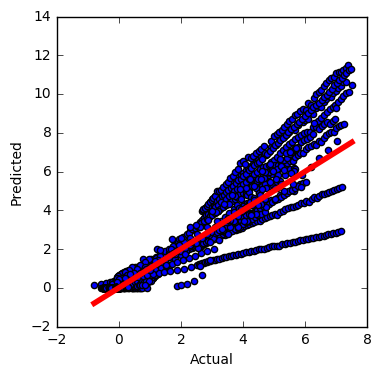

In [3]:
items1 = [data_file,test_withheld,model_select,run_button,save_toggle]
items2 = [save_file,save_button]
gui_1 = VBox(layout=widgets.Layout(width='95%',display='inline-flex'))
gui_1.children = [HBox(items1)]
display(gui_1)

In [5]:
model_dir = widgets.Text(description='Model Directory',placeholder='datasets/my_model.txt')
load_button = widgets.Button(description='Load Model')    
a_select = widgets.Dropdown(options=['water','methanol'],value='methanol',description='A: ')
b_select = widgets.Dropdown(options=['water','methanol'],value='water',description='B: ')
temp_slider = widgets.IntSlider(value=298,min=100,max=400,step=1,orientation='horizontal',description='Temp (K)')
p_slider = widgets.IntSlider(value=100,min=5,max=400,step=1,orientation='horizontal',description='Pressure (kPa)')

def load_event(b):
    clear_output()
    gui2.children = [HBox([model_dir,temp_slider,p_slider]),HBox([a_select,b_select])]
    obj = utils.read_model(model_dir.value)
    print(obj)

gui2 = VBox(layout=widgets.Layout(width='95%',display='inline-flex'))
gui2.children = [HBox([model_dir,load_button])]
display(gui2)

load_button.on_click(load_event)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
